In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skillsnetwork import cvstudio

In [2]:
client = cvstudio.CVStudio()

In [3]:
annotations = client.get_annotations()
modeldetails = client.downloadModel()
kbest = modeldetails["k_best"]

In [4]:
storage = cv2.FileStorage(modeldetails['filename'], cv2.FILE_STORAGE_READ)
knn_yml = storage.getNode('opencv_ml_knn')

knn_format = knn_yml.getNode('format').real()
is_classifier = knn_yml.getNode('is_classifier').real()

default_k = knn_yml.getNode('default_k').real()
samples = knn_yml.getNode('samples').mat()
responses = knn_yml.getNode('responses').mat()
storage.release()
knn = cv2.ml.KNearest_create()
knn.train(samples, cv2.ml.ROW_SAMPLE, responses)

True

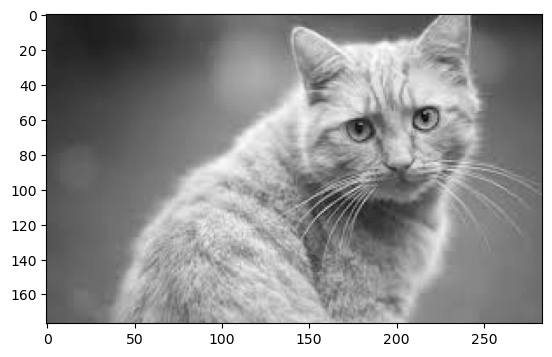

In [5]:
img = cv2.imread('catimage1.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

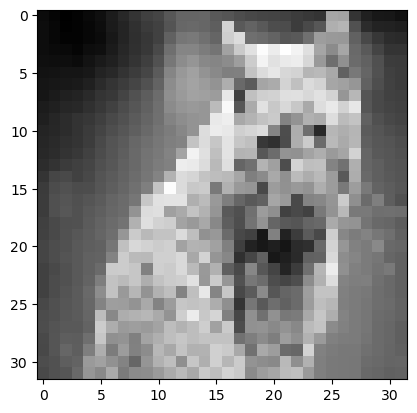

In [6]:
img = cv2.resize(img, (32,32))
plt.imshow(img, cmap = 'gray')

In [7]:
pixels = img.flatten()
pixels = np.array([pixels]).astype('float32')

In [18]:
ret, result, neighbours, dist = knn.findNearest(pixels, k=kbest[0])

print("Your image was classified as a " + str(annotations['labels'][int(ret)]))

print("Neighbours include " + str(annotations['labels'][int(neighbours)]))

Your image was classified as a cat
Neighbours include cat
